# Task 1

## a)

a) Import the data using pandas and the read_excel function

In [1]:
import pandas as pd

In [2]:
data = pd.read_excel('Concrete_data.xls')
data.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


## b)

b) Explore the data graphically using the matplotlib library, e.g. visualize the distribution of the different variables. As a bonus try to generate a scatter plot using the plotting.scatter_matrix function of pandas to show possible correlations within the dataset.


In [3]:
import matplotlib.pyplot as plt

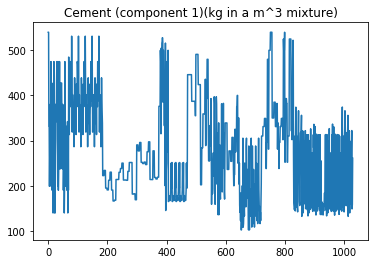

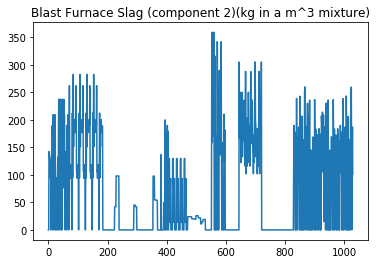

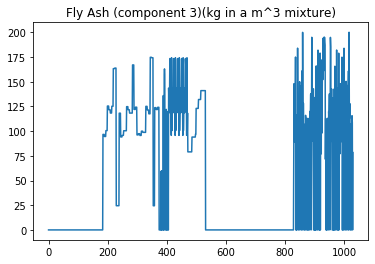

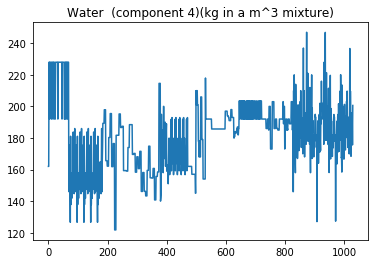

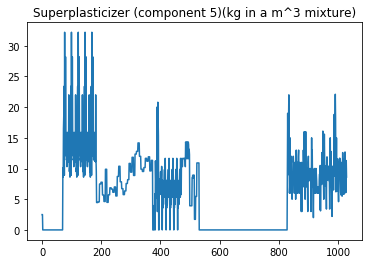

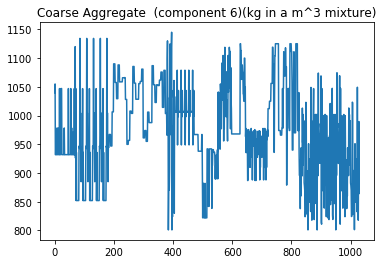

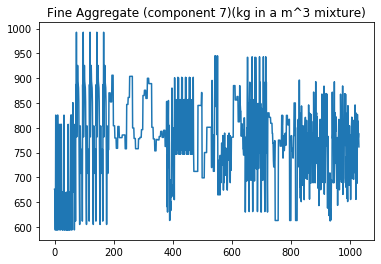

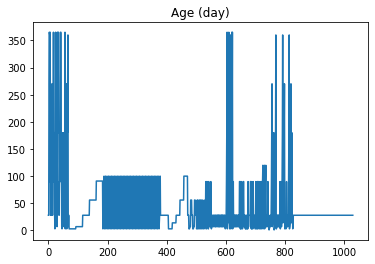

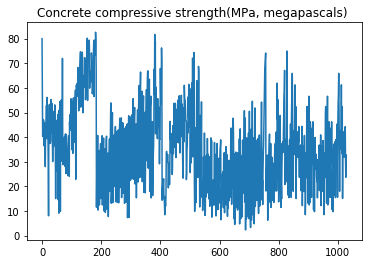

In [4]:
for variable in data.columns:
    data[variable].plot(title = variable)
    plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E37E0D3248>,
      dtype=object)

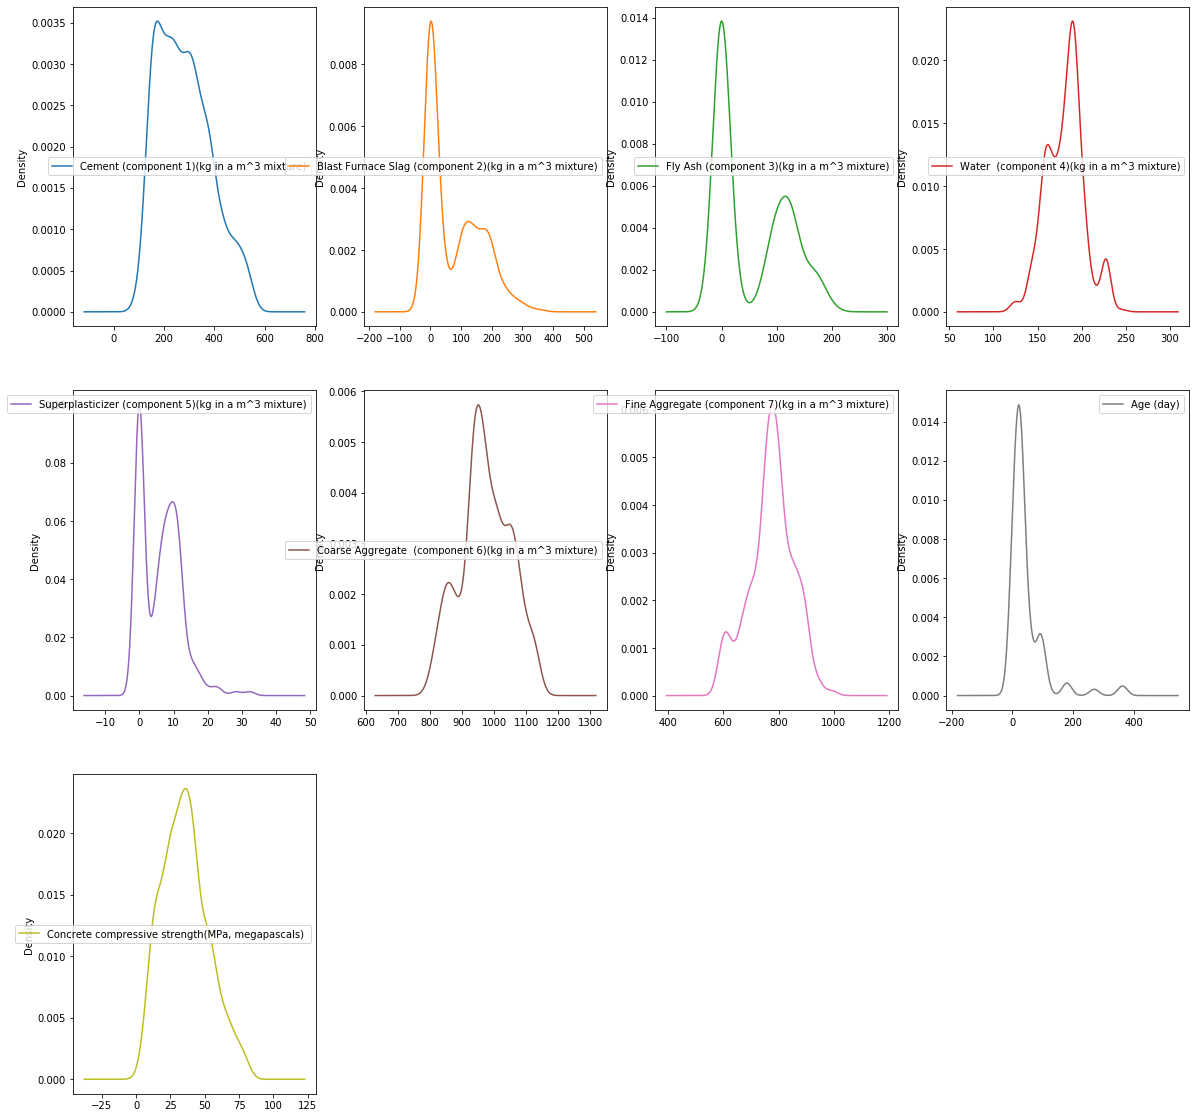

In [5]:
data.plot(kind = 'density', subplots = True, layout = (3,4) , sharex = False, sharey = False, figsize = (20,20),legend = True)

In [6]:
from pandas.plotting import scatter_matrix

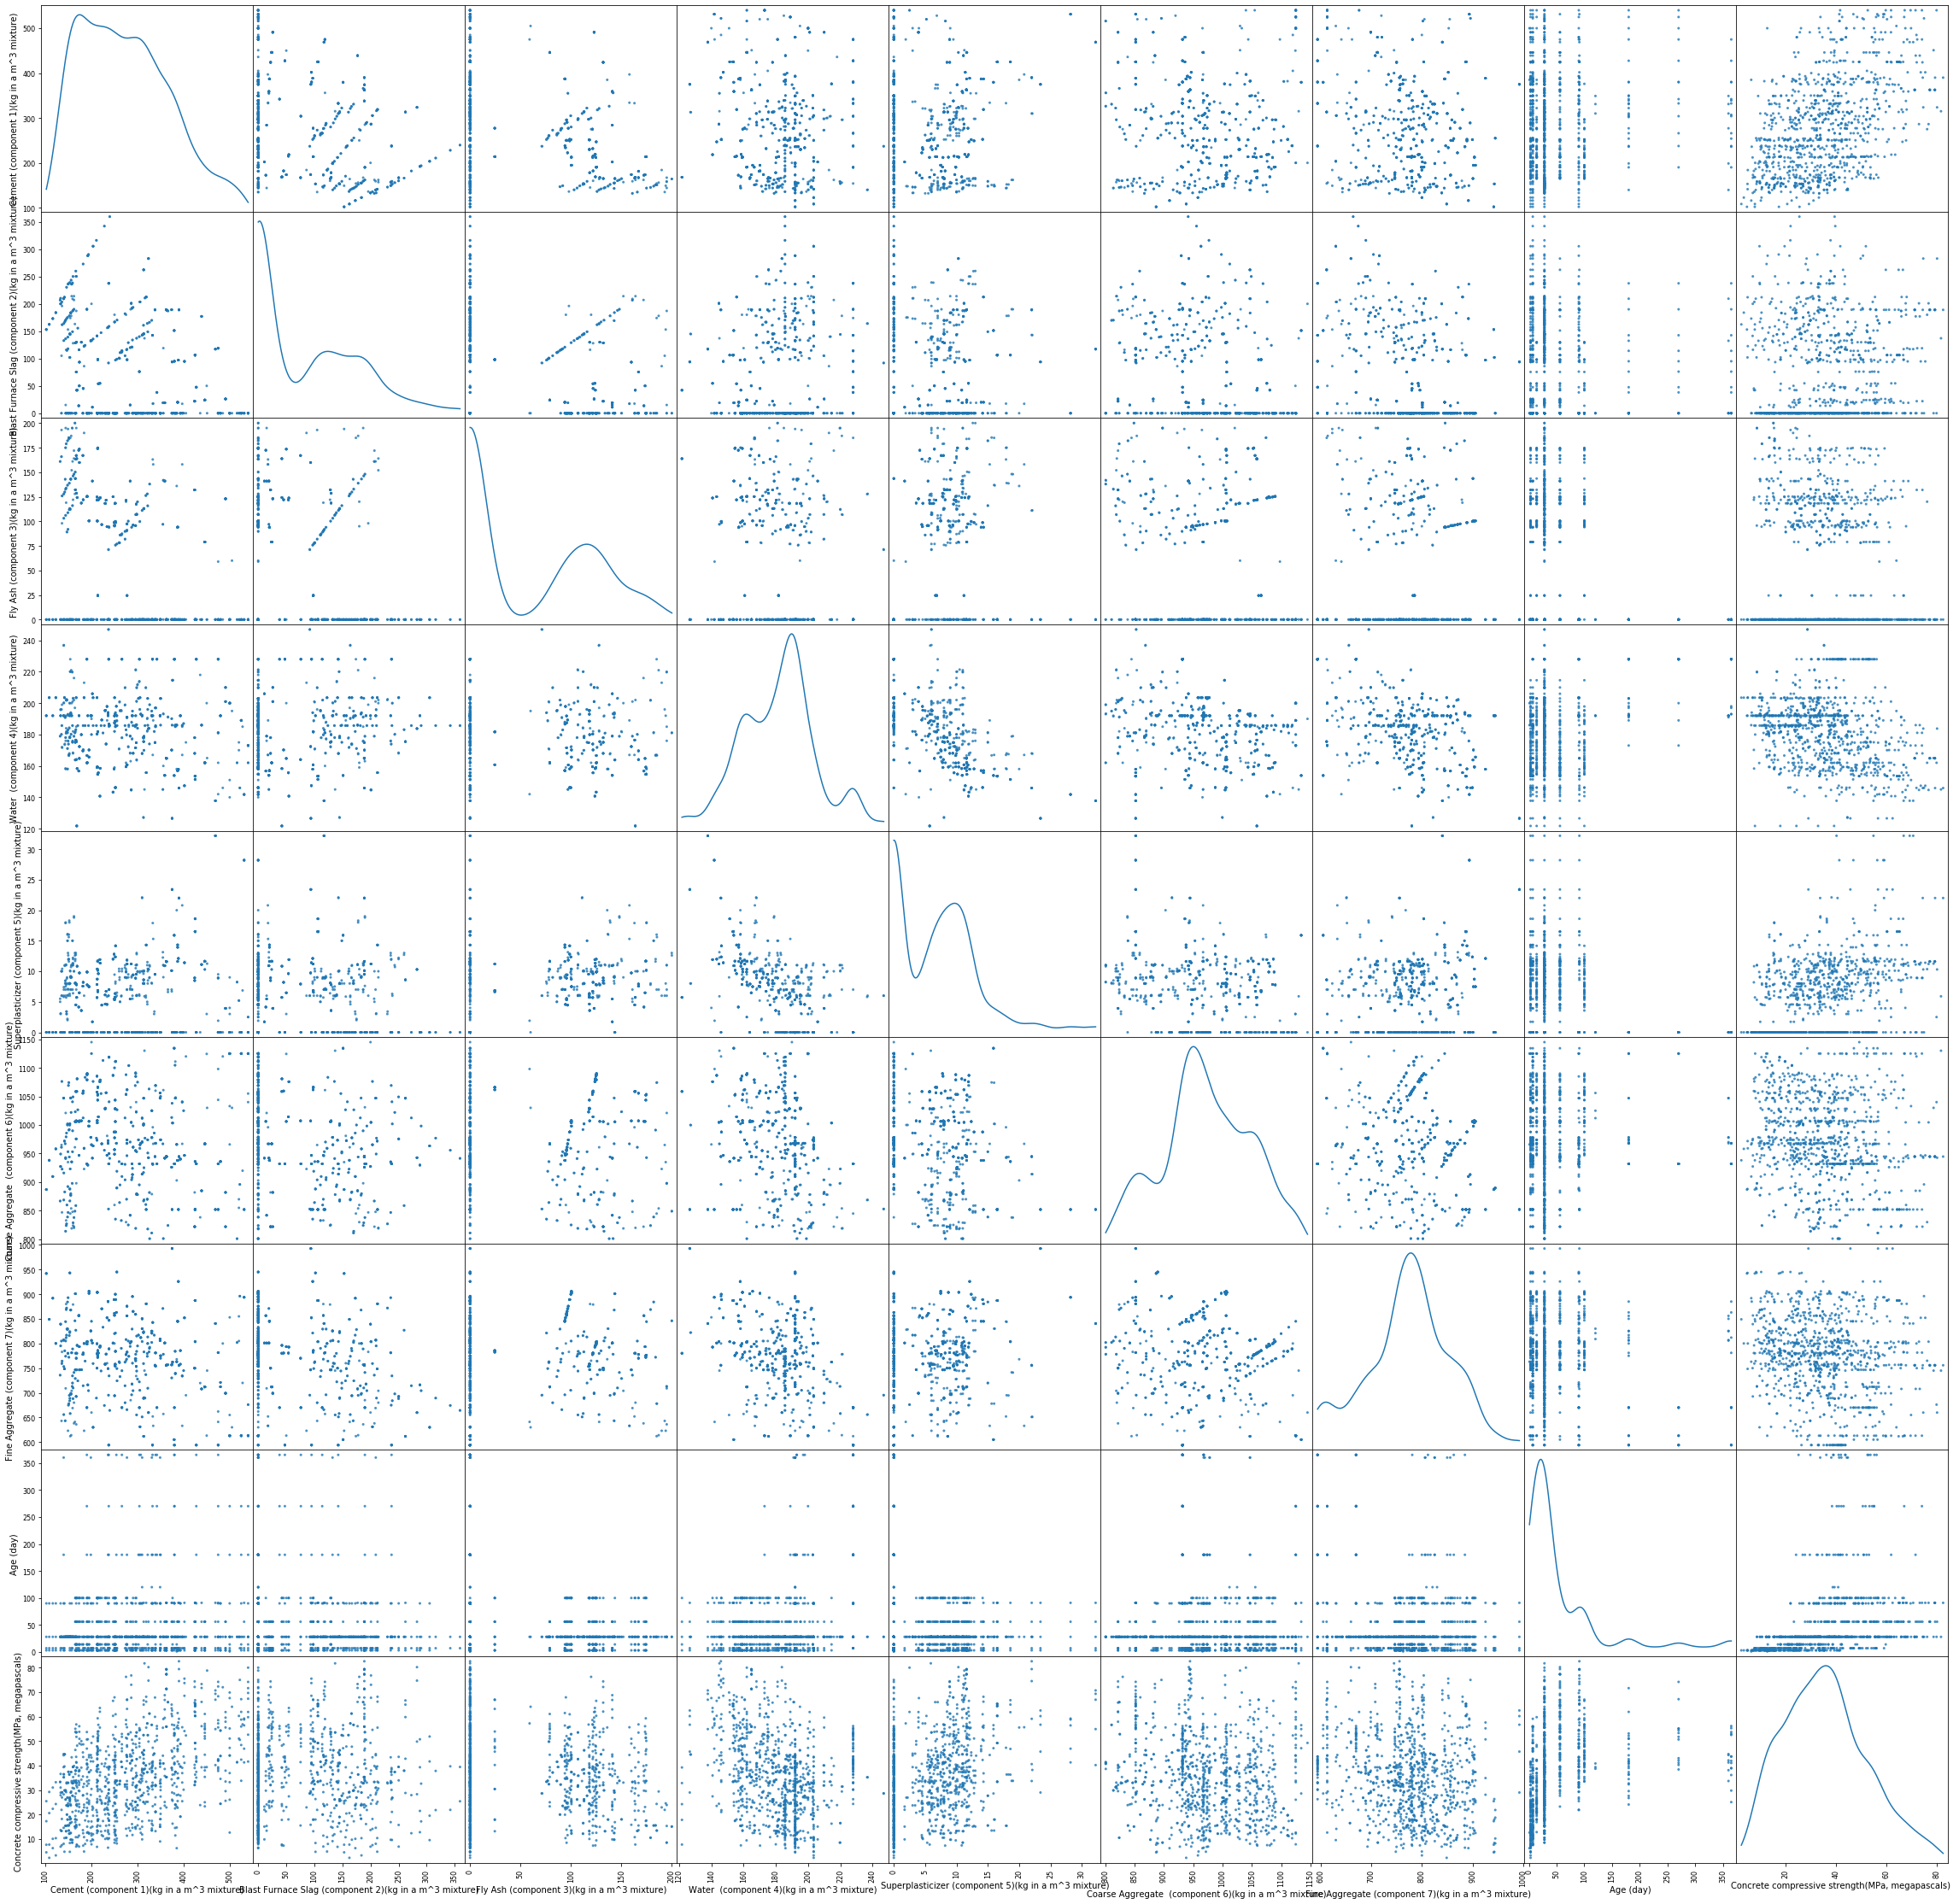

In [7]:
scatter_matrix(data, alpha = 0.8, figsize = (40,40), diagonal = 'kde')
plt.show()

## c)

c) Split the available dataset into a train and test dataset using the train_test_split method from sklearn.model_selection.

In [8]:
from sklearn.model_selection import train_test_split

X = data.iloc[:,:-1]
y = data.iloc[:,-1]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

## d)

d) Train the regression model using the sklearn.linear_model.LinearRegression class.

In [9]:
from sklearn.linear_model import LinearRegression

# create object
regr = LinearRegression()

# train model
regr.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## e)

e) Test your model by making a prediction using the sklearn.linear_model.LinearRegression.predict method.



In [10]:
y_pred = regr.predict(X_test)

## f)

f) Evaluate your model using the two metrics “mean squared error” and “r2” from sklearn.metrics.


In [11]:
from sklearn.metrics import r2_score,mean_squared_error

r2_score = r2_score(y_test,y_pred)
MSE = mean_squared_error(y_test,y_pred)

print("R2 Score:", r2_score)
print("MSE:", MSE)

R2 Score: 0.5466432385495035
MSE: 118.80055307820297


## g)

g) Bonus: Implement a 5-fold cross validation to train/test your model.

In [12]:
from sklearn.model_selection import cross_val_score
import numpy as np

In [13]:
scores =cross_val_score(regr, X, y, cv=5, scoring='r2')

In [14]:
np.mean(scores)

0.46106854740704206

## h)

h) Bonus: Try different regression algorithms

In [15]:
from sklearn.linear_model import *

In [16]:
from sklearn import tree

In [17]:
decision_tree_model = tree.DecisionTreeRegressor()

In [18]:
scores =cross_val_score(decision_tree_model, X, y, cv=5, scoring='r2')

In [19]:
np.mean(scores)

0.22678448010960608

In [23]:
bayesian_model = BayesianRidge()

In [24]:
scores =cross_val_score(bayesian_model, X, y, cv=5, scoring='r2')

In [25]:
np.mean(scores)

0.4681298543114413

# Task 2

## a)

a) Import the dataset using the sklearn.datasets.load_iris method.

In [27]:
from sklearn import datasets

In [28]:
iris_dataset = datasets.load_iris()

## b)

b) Store the dataset in a pandas using a pandas DataFrame.

In [33]:
data = pd.DataFrame(iris_dataset.data, columns=iris_dataset.feature_names)
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


## c)

c) Explore the data graphically using the matplotlib library, e.g. visualize the distribution of the
different variables. As a bonus try to generate a scatter plot using the
plotting.scatter_matrix function of pandas to show possible correlations within the dataset.


In [34]:
data['target'] = iris_dataset['target']

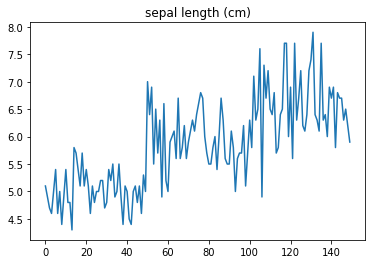

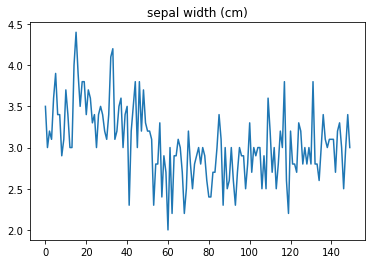

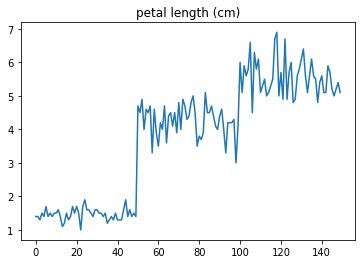

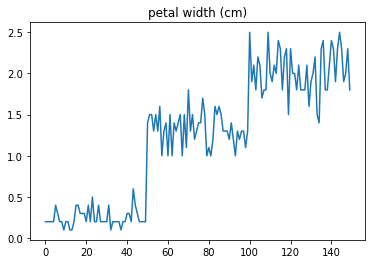

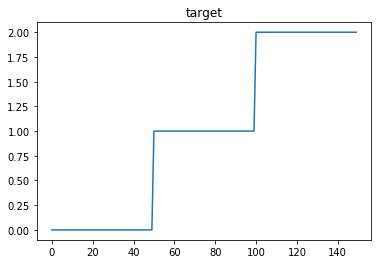

In [37]:
for variable in data.columns:
    data[variable].plot(title=variable)
    plt.show()

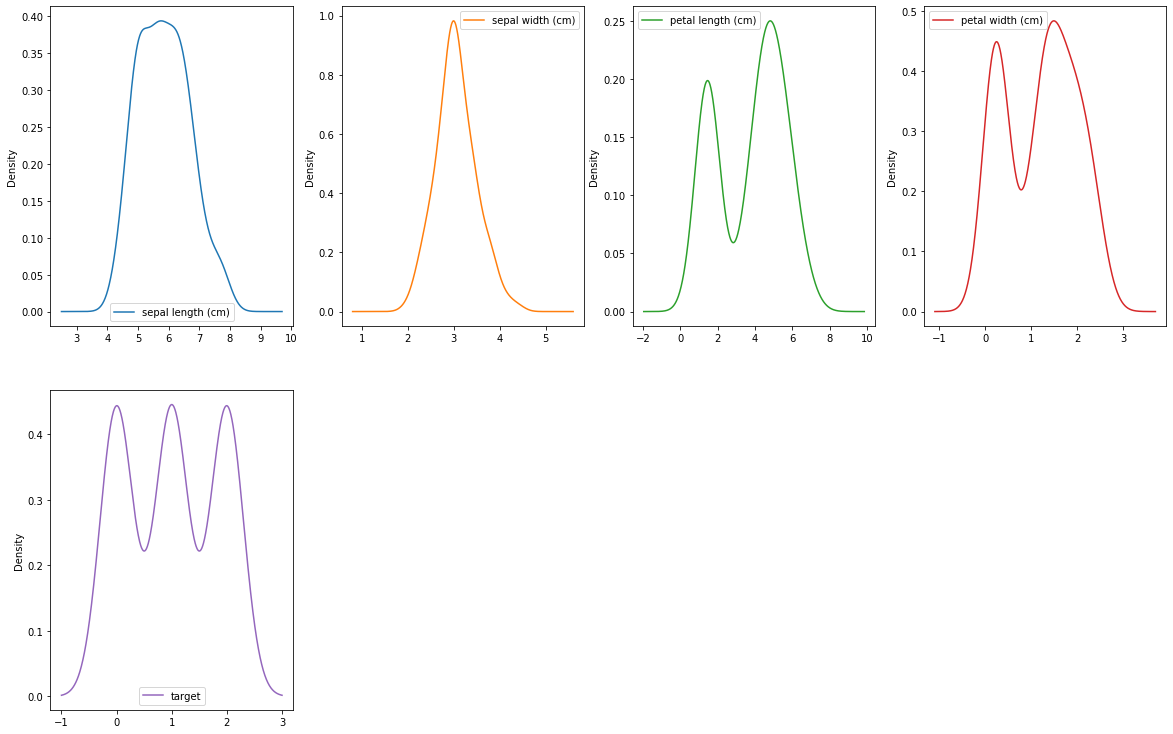

In [39]:
data.plot(kind = 'density', subplots = True, layout = (3,4) , sharex = False, sharey = False, figsize = (20,20),legend = True)
plt.show()

## d)

d) Split the available dataset into a train and test dataset using the train_test_split method from
sklearn.model_selection.

In [40]:
X = data.drop('target', axis=1)
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [41]:
classifier_model = tree.DecisionTreeClassifier(max_depth = 2)
classifier_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

## e), f), g)

e) Train the classification model using a Decision Tree Classifier. For that use the
sklearn.tree.DecisionTreeClassifier class.

f) Test your model by making a classification using the
sklearn.tree.DecisionTreeClassifier.predict method.

g) Evaluate your model by printing both the confusion matrix and the classification report from
sklearn.metrics. 

In [43]:
from sklearn.metrics import confusion_matrix, classification_report

In [45]:
y_pred = classifier_model.predict(X_test)

In [48]:
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[ 8  0  0]
 [ 0 10  1]
 [ 0  2  9]]


In [59]:
from IPython.display import Image
image(filename='image.png')

NameError: name 'image' is not defined

In [49]:
iris_dataset['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [50]:
print('Classification Report:')
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.83      0.91      0.87        11
           2       0.90      0.82      0.86        11

    accuracy                           0.90        30
   macro avg       0.91      0.91      0.91        30
weighted avg       0.90      0.90      0.90        30



# h)

h) Bonus: Implement a 5-fold cross validation to train/test your model.


In [51]:
cross_val_score(classifier_model, X, y, cv=5, scoring='accuracy')

array([0.93333333, 0.96666667, 0.9       , 0.86666667, 1.        ])

In [53]:
sgd_model = SGDClassifier(max_iter=1000, tol=0.001)
cross_val_score(sgd_model, X, y, cv=5, scoring='accuracy')

array([0.66666667, 0.73333333, 0.66666667, 0.9       , 0.93333333])

## i)

i) Bonus: Try different regression algorithms.


In [54]:
from sklearn.neighbors import KNeighborsClassifier

In [56]:
knn_model = KNeighborsClassifier()
np.mean(cross_val_score(knn_model, X, y, cv = 5, scoring = 'accuracy'))

0.9733333333333334